## Import library 

In [249]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
# !pip install wordcloud
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer


### Import CSV File

In [250]:
train = pd.read_csv('BBC News Train.csv')
test = pd.read_csv('BBC News Test.csv')
cat = pd.read_csv('BBC News Sample Solution.csv')

### Checking shape of the data

In [251]:
test.shape, train.shape, cat.shape

((735, 2), (1490, 3), (735, 2))

In [252]:
train.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [253]:
test.head()

,ArticleId,Text
0,1018,qpr keeper day heads for preston queens park r...
1,1319,software watching while you work software that...
2,1138,d arcy injury adds to ireland woe gordon d arc...
3,459,india s reliance family feud heats up the ongo...
4,1020,boro suffer morrison injury blow middlesbrough...


In [254]:
cat.head()

,ArticleId,Category
0,1018,sport
1,1319,tech
2,1138,business
3,459,entertainment
4,1020,politics


In [255]:
test['Category'] = cat['Category']

In [256]:
test.shape, train.shape

((735, 3), (1490, 3))

In [257]:
df = pd.concat([train,test])

In [258]:
df.to_csv('articles.csv')

In [259]:
df.shape

(2225, 3)

In [260]:
df['Category'].value_counts()

Category
sport            493
business         483
politics         421
entertainment    420
tech             408
Name: count, dtype: int64

<Axes: xlabel='Category', ylabel='Count'>

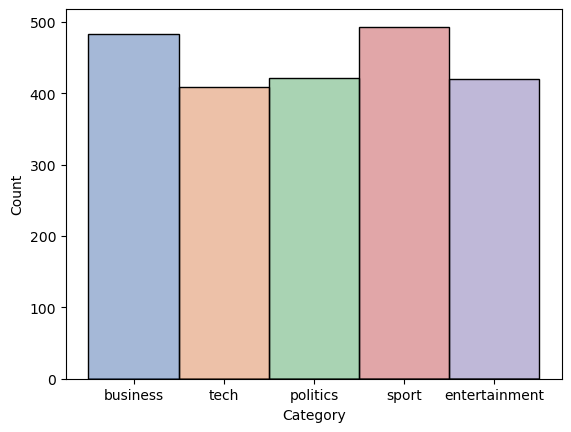

In [261]:
sns.histplot(data = df ,x = 'Category' , hue = 'Category' , palette = 'deep' , legend = False)

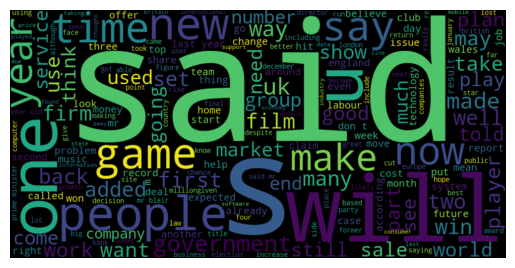

In [262]:
words = []
for message in df['Text']:
    words.extend([word for word in message.split()])
        
wordcloud = WordCloud(width = 1000, height = 500).generate(" ".join(words))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Above word cloud is before removing stopwords from text.

In [263]:
def clean_text(text):
    
    #Convert the text to lowercase
    text = text.lower()
    
    #Remove punctuation marks from the text
    text = ''.join([char for char in text if char not in string.punctuation])
    
    #Remove stopwords from the text
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])
    return text

# Additional steps like stemming or lemmatization

#### The above code will clean the input text by converting into lowercase, removing punctuation, and eliminating stopwords. It's commonly used as a preprocessing step in natural language processing tasks like text classification or sentiment analysis.

In [264]:
df['Text']=df['Text'].apply(clean_text)

In [265]:
df['Text']=df['Text'].apply(lambda x : ' '.join([i for i in x.split() if i.isalpha()]))

#### So, overall, this line of code removes non-alphabetic characters (such as punctuation : A5bn8) from each text string in the 'Text' column of the DataFrame df.

In [266]:
from nltk.tokenize import word_tokenize

## This code generates a word cloud visualization from the text data in the 'Text' column 

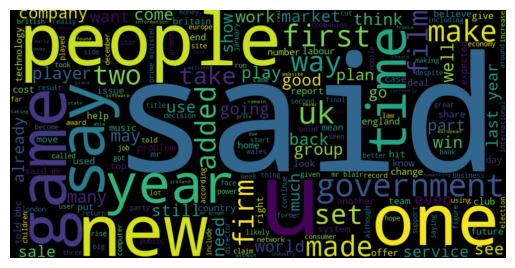

In [267]:
words = []
for message in df['Text']:
    words.extend([word for word in message.split() if word not in STOPWORDS])
        
wordcloud = WordCloud(width = 1000, height = 500).generate(" ".join(words))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Distribution of Categories using Bar plot and Pie-Chart

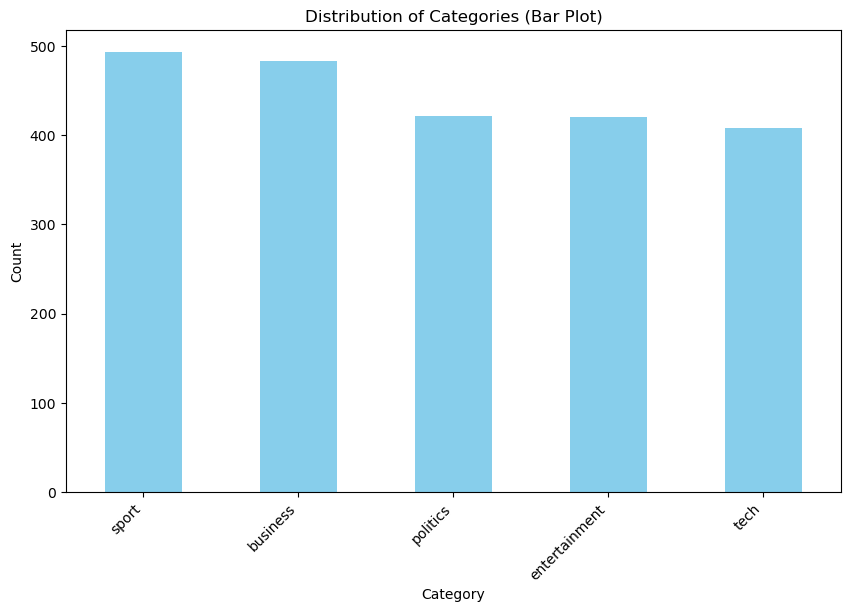

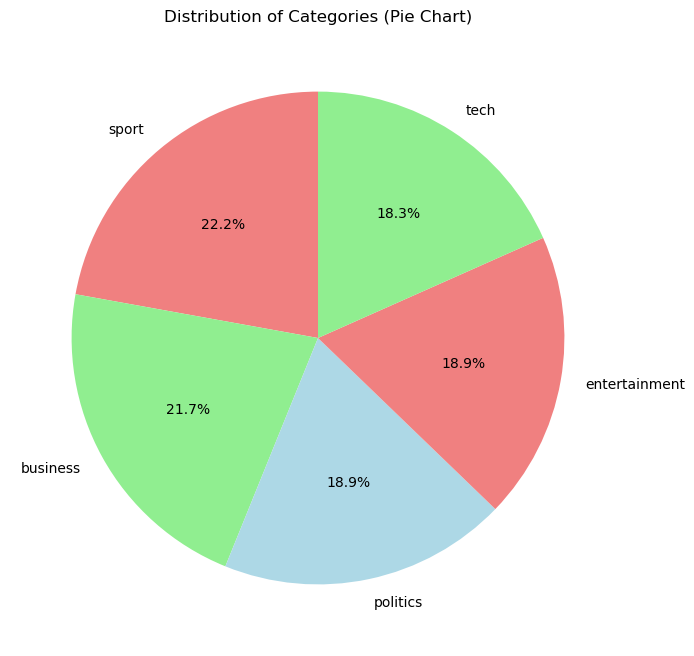

In [268]:
# Assuming 'Category' is the column containing categories
category_distribution = df['Category'].value_counts()

# Plot the distribution using a bar plot
plt.figure(figsize=(10, 6))
category_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Categories (Bar Plot)')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

# Alternatively, you can use a pie chart
plt.figure(figsize=(8, 8))
category_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgreen', 'lightblue'])
plt.title('Distribution of Categories (Pie Chart)')
plt.ylabel('')  # Remove the default 'count' label on the y-axis
plt.show()

In [269]:
train.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


# Word lemmatization

In [270]:
lemmatizer= WordNetLemmatizer()

In [271]:
df['Text'] = df['Text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

## Specifying Independent variables and Dependend Variables

In [272]:
X=df.drop(columns=['Category','ArticleId'],axis=1)
y=df['Category']

In [273]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [274]:
X_train.shape,y_train.shape

((1780, 1), (1780,))

### TF-IDF Vectorizer

In [275]:
tf = TfidfVectorizer()

In [276]:
tf.fit(X_train['Text'])

TfidfVectorizer()

In [277]:
tfidf_train = tf.transform(X_train['Text'])
tfidf_test = tf.transform(X_test['Text'])

### The TF-IDF Vectorizer is a popular tool used in natural language processing for converting a collection of text documents into numerical feature vectors

## Model Building

#### Model Building on logistic Regression 

In [278]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [279]:
lr = LogisticRegression()
lr.fit(tfidf_train,y_train)
y_pred = lr.predict(tfidf_test)

print("Logistc Regression")

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Logistc Regression
Accuracy: 0.7393258426966293
Precision: 0.7405255958128698
Recall: 0.7393258426966293
F1 Score: 0.7392422143488152
Classification Report:
                precision    recall  f1-score   support

     business       0.72      0.74      0.73        92
entertainment       0.74      0.71      0.72        82
     politics       0.77      0.75      0.76        83
        sport       0.71      0.78      0.75       101
         tech       0.77      0.71      0.74        87

     accuracy                           0.74       445
    macro avg       0.74      0.74      0.74       445
 weighted avg       0.74      0.74      0.74       445

Confusion Matrix:
 [[68  4  4 10  6]
 [ 8 58  3  9  4]
 [ 3  7 62  7  4]
 [ 9  4  4 79  5]
 [ 6  5  8  6 62]]


#### Model Building on naive_bayes

In [280]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(tfidf_train.toarray(),y_train)
y_pred = nb.predict(tfidf_test.toarray())
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# print("* Matrix:\n", conf_matrix)


Accuracy: 0.7325842696629213
Precision: 0.7333696443921646
Recall: 0.7325842696629213
F1 Score: 0.7320352717104881
Classification Report:
                precision    recall  f1-score   support

     business       0.74      0.74      0.74        92
entertainment       0.74      0.67      0.71        82
     politics       0.73      0.75      0.74        83
        sport       0.71      0.79      0.75       101
         tech       0.74      0.70      0.72        87

     accuracy                           0.73       445
    macro avg       0.73      0.73      0.73       445
 weighted avg       0.73      0.73      0.73       445



#### Model Building on Support Vector Classifier

In [281]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Initialize SVC classifier
svc = SVC()

# Train the classifier
svc.fit(tfidf_train, y_train)

# Make predictions
y_pred = svc.predict(tfidf_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.7303370786516854
Precision: 0.730860322528446
Recall: 0.7303370786516854
F1 Score: 0.7298660560702072
Classification Report:
                precision    recall  f1-score   support

     business       0.72      0.73      0.72        92
entertainment       0.72      0.72      0.72        82
     politics       0.73      0.75      0.74        83
        sport       0.73      0.78      0.76       101
         tech       0.75      0.67      0.71        87

     accuracy                           0.73       445
    macro avg       0.73      0.73      0.73       445
 weighted avg       0.73      0.73      0.73       445

Confusion Matrix:
 [[67  4  5 10  6]
 [ 8 59  3  7  5]
 [ 3  7 62  7  4]
 [ 9  4  5 79  4]
 [ 6  8 10  5 58]]


### on above codes, Compare the accuracy scores to determine which algorithm performs better. Analyze the confusion matrices to understand how each model performs in terms of true positives, true negatives, false positives, and false negatives.

## Hyperparameter Tunining of Logistic Regression

In [282]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform

# Define hyperparameter grid
param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization penalty (L1 or L2)
    'C': uniform(0.1, 10),     # Inverse of regularization strength
    'solver': ['liblinear', 'saga']  # Algorithm to use in optimization
}

# Initialize Logistic Regression model
log_reg = LogisticRegression()

# Initialize Random Search CV
random_search = RandomizedSearchCV(log_reg, param_distributions=param_grid, n_iter=10, cv=5, random_state=42)

# Fit Random Search CV to the data
random_search.fit(tfidf_train, y_train)  # Replace X_train and y_train with your training data

# Print best hyperparameters and best score
print("Best Hyperparameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)


C:\Users\bhavi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\bhavi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\bhavi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\bhavi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\bhavi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best Hyperparameters: {'C': 0.6808361216819946, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score: 0.7005617977528089


## Hyperparameter Tuining of Support Vector Classifier

In [283]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from scipy.stats import uniform

# Define hyperparameter grid
param_grid = {
    'C': uniform(0.1, 10),  # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel type
    'gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
    'degree': [2, 3, 4]  # Degree of the polynomial kernel function ('poly' only)
}

# Initialize SVC classifier
svc = SVC()

# Initialize Randomized Search CV
random_search = RandomizedSearchCV(svc, param_distributions=param_grid, n_iter=100, cv=5, random_state=42)

# Fit Randomized Search CV to the data
random_search.fit(tfidf_train, y_train)  # Replace tfidf_train and y_train with your training data

# Print best hyperparameters and best score
print("Best Hyperparameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)


Best Hyperparameters: {'C': 0.8534625600612821, 'degree': 2, 'gamma': 'scale', 'kernel': 'sigmoid'}
Best Score: 0.698876404494382


## Hyperparameter Tuining of Naive Bayes

In [284]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import MultinomialNB
from scipy.stats import uniform, randint

# Define hyperparameter grid
param_grid = {
    'alpha': uniform(0.1, 2),  # Additive (Laplace/Lidstone) smoothing parameter
    'fit_prior': [True, False]  # Whether to learn class prior probabilities or not
}

# Initialize Naive Bayes classifier
naive_bayes = MultinomialNB()

# Initialize Randomized Search CV
random_search = RandomizedSearchCV(naive_bayes, param_distributions=param_grid, n_iter=100, cv=5, random_state=42)

# Fit Randomized Search CV to the data
random_search.fit(tfidf_train, y_train)  # Replace tfidf_train and y_train with your training data

# Print best hyperparameters and best score
print("Best Hyperparameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)


Best Hyperparameters: {'alpha': 0.6078308278686894, 'fit_prior': False}
Best Score: 0.7089887640449438
